## Draw Dispersion Relation


In [7]:
from sympy import sqrt, pi
from scipy.constants import e, m_p, m_e, c; m_i_N, m_e_N = m_p, m_e
import sinupy.mediums.plasma as pms

import matplotlib.pyplot as plt
from sympy import init_printing; init_printing()
from sinupy.draw import draw_discontinuable_expr, add_line_with_slope

import sinupy.algebra.utility as fualguti

In [8]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

In [9]:
from sinupy import mediums, waves
from sinupy.waves import EM
plasma = mediums.ColdMagnetizedPlasma(species='e+i')
wave_eq = waves.EM.WaveEq(plasma)
wave = wave_eq.wave

In [10]:
omega_ce = pms.omega_ce(plasma=plasma)
omega_pe = pms.omega_pe(plasma=plasma)
# Even if your plasma.species is 'e', the ion-relevant symbols would not interrupt ...
# our calculation procedure, because `expr.subs(a_specific_symbol, a_numeric_value)` ...
# also would not interrupt our procedure (i.e. throw an exception) when it finds there ...
# does not exist such `a_specific_symbol` in the formula.
omega_ci = pms.omega_cj(plasma=plasma, varidx='i')
omega_pi = pms.omega_pj(plasma=plasma, varidx='i')

# Substitute symbol parameters with accurate numerical values.
# Note the function will capture the variables B, n_0, m_i from the working scope.

w2N = lambda expr: expr\
    .subs(omega_ce, pms.omega_ce(B=B))\
    .subs(omega_pe, pms.omega_pe(n_0=n_0))\
    .subs(omega_ci, pms.omega_cj(q_e=1, m=m_i_N, B=B))\
    .subs(omega_pi, pms.omega_pj(n_0=n_0, q_e=1, m=m_i_N))

### $N^2(\omega, \theta)$
Express $N^2$ with $\omega$, $\omega_{ce}$, $\omega_{pe}$ and *e.t.c.* instead of $\kappa_\perp$, $\kappa_\times$, $\kappa_\parallel$.

$N = |\vec{k}|/|\vec{k}_0|$, where $|\vec{k}_0| = \omega / c$ is the wave vector of the electromagnetic wave with $\omega$ (angular) frequency in vacuum.

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


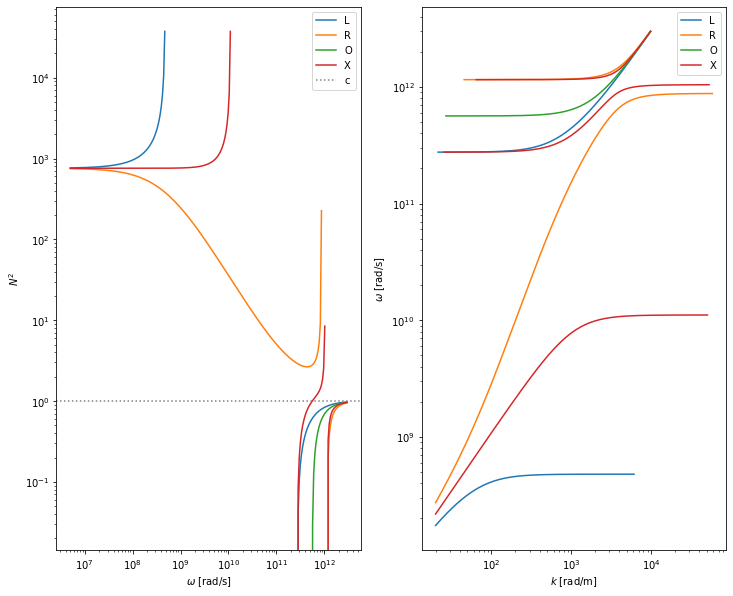

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

ax = axs[0]
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel('$\omega$ [rad/s]') 
ax.set_ylabel('$N^2$') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)

ax = axs[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$k$ [rad/m]') 
ax.set_ylabel('$\omega$ [rad/s]') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)
ax.tick_params(axis='y', which='minor', left=True, labelleft=True)

B, n_0 = 5, 1e20
for theta in [0, pi/2]:
    N2_in_omega = [
        pms.kappa2omega(sol, wave, plasma) for sol in # kappa -> omega.
        EM.solve_N2(wave_eq, theta=theta)] # <-- Set theta here    
    # omega -> accurate numerical values.
    N2 = [w2N(sol) for sol in N2_in_omega] 
    # Now N^2 only depends on wave.w
    
    if theta == 0: 
#         draw_kwarg['labels'] = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
        subkwarg = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
    elif theta == pi/2:
#         draw_kwarg['labels'] = ['O', 'X']
        subkwarg = [{'label': 'O'}, {'label': 'X'}] # ['L', 'R']
    else:
        subkwarg = None
        
    ax = axs[0]
    draw_discontinuable_expr(
        N2, wave.w, 
        varlim=(0.5e7, 3e12), # limit of wave angular frequency, omega
        exprlim=(-0.4, 1e5), # limit of N^2, refraction index
        num=250,
        var_sample_scale='log', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[1]
    k_in_w = [wave.w / c * sqrt(sol) for sol in N2]
    draw_discontinuable_expr(
        k_in_w, wave.w, 
        varlim=(0.5e7, 3e12), # limit of wave angular frequency, omega, rad/s
        exprlim=(2e1, 6e4),        # limit of wave vector length, k, rad/m
        num=int(1e5), var_is_yaxis=True,
        var_sample_scale='log', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
axs[0].axhline(y=0, color='lightgrey', linestyle=':')       # N^2 = 1
axs[0].axhline(y=1, color='grey', linestyle=':', label='c') # N^2 = 0
# Add a line corresponding to light in vacuum. 
# add_line_with_slope(axs[1], c, num=500, color='grey', linestyle='--', label='c')
[ax.legend() for ax in axs]

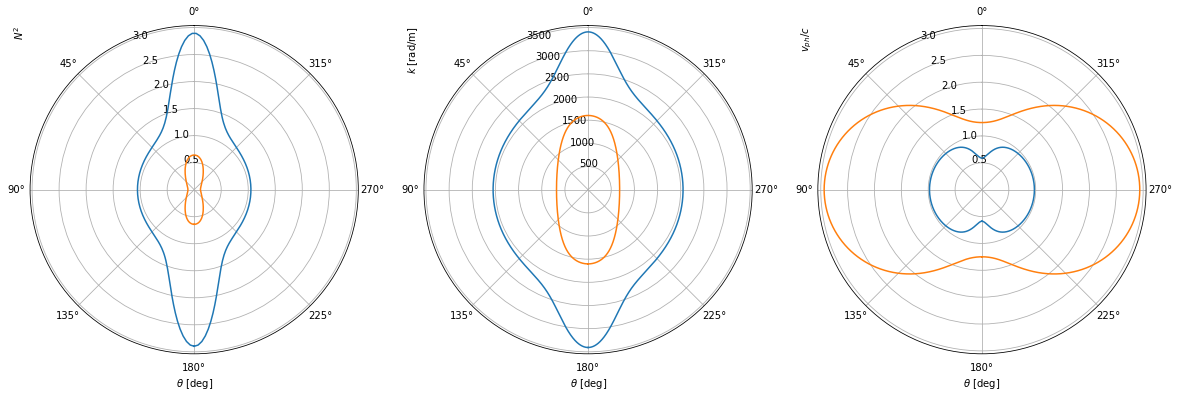

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 12), subplot_kw={'projection': 'polar'})

for ax in axs:
    ax.set_xlabel('$\\theta$ [deg]') 
    ax.grid(True)
    ax.set_theta_zero_location('N')

axs[0].set_ylabel('$N^2$', loc='top') 
axs[1].set_ylabel('$k$ [rad/m]', loc='top') 
axs[2].set_ylabel('$v_{ph}/c$', loc='top') 

B, n_0 = 5, 1e20
theta = EM.theta_btwn_B_and_k(wave_eq)
# Substitute kappa components with omega.
N2_in_omega_theta = [
    pms.kappa2omega(sol, wave, plasma) for sol in 
    EM.solve_N2(wave_eq)]
for omega in [6e11]: # Usually `omega` expresses a fixed parameter, while `w` expresses a variable


    N2_in_theta = [w2N(sol.subs(wave.w, omega)) for sol in N2_in_omega_theta]    
    
    ax = axs[0]
    draw_discontinuable_expr(
        N2_in_theta, theta, 
        varlim=(-3.14159, 3.14159), # limit of theta, from [0, pi]
        exprlim=(-0.4, 1e5), # limit of N^2, refraction index
        num=250,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[1]
    k_in_theta = [omega / c * sqrt(sol) for sol in N2_in_theta]    
    draw_discontinuable_expr(
        k_in_theta, theta, 
        varlim=(-float(pi), float(pi)), # limit of theta, from [0, pi]
#         exprlim=(0, 6e4), # limit of wave vector length, k, rad/m
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[2]
    v_ph_ratio_c_in_theta = [1 / sqrt(sol) for sol in N2_in_theta]
    draw_discontinuable_expr(
        v_ph_ratio_c_in_theta, theta, 
        varlim=(-float(pi), float(pi)), # limit of theta, from [0, pi]
#         exprlim=(0, 6e4), # limit of v_ph, wave phase speed, m/s
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    

# Add a line corresponding to light in vacuum. 
# add_line_with_slope(axs[1], c, num=500, color='grey', linestyle='--', label='c')
# [ax.legend() for ax in axs]

## References:

- For better color impression, [matplotlib official color gallery](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) can ben refered.
